In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [59]:
df = pd.read_csv("SGD3_Standardized_data.csv")
df.head()

,Continent,country,Goal,year,Indicator 3.1.1: Maternal mortality ratio,Indicator 3.2.1: Under-5 mortality rate,Indicator 3.2.2: Neonatal mortality rate,Indicator 3.3.1: Number of new HIV infections,Indicator 3.3.2: Tuberculosis incidence,Indicator 3.7.2: Adolescent birth rate,Indicator 3.c.1: Health worker density and distribution,Indicator 3.d.1: International Health Regulations(IHR) capacity and health emergency preparedness,SDG3 Composite Index
0,Asia,Afghanistan,3,2000,4.581127,0.611999,0.646544,-0.296914,0.359109,5.568082,-3.950762,-4.978741,9.903617
1,Asia,Afghanistan,3,2001,4.295695,0.590513,0.606361,-0.296421,0.353708,5.018361,-1.443246,-4.076644,8.263832
2,Asia,Afghanistan,3,2002,4.310913,0.562347,0.598183,-0.295614,0.353708,3.359626,-3.110255,-3.671440,7.659219
3,Asia,Afghanistan,3,2003,3.992097,0.569736,0.646649,-0.295459,0.353708,1.886432,-2.523058,-2.751872,6.285635
4,Asia,Afghanistan,3,2004,3.673336,0.581211,0.654906,-0.295212,0.353708,3.884990,-3.034437,-3.687085,7.558794


# Machine Learning Modeling and Analysis

In [61]:
indicator_columns = df.columns[4:-1]
indicator_columns

Index(['Indicator 3.1.1: Maternal mortality ratio',
       'Indicator 3.2.1: Under-5 mortality rate',
       'Indicator 3.2.2: Neonatal mortality rate',
       'Indicator 3.3.1: Number of new HIV infections',
       'Indicator 3.3.2: Tuberculosis incidence',
       'Indicator 3.7.2: Adolescent birth rate',
       'Indicator 3.c.1: Health worker density and distribution',
       'Indicator 3.d.1: International Health Regulations(IHR) capacity and health emergency preparedness'],
      dtype='object')

## Linear regression 

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

indicator_columns = df.columns[4:-1]
# Select the features and target variable
features = df[indicator_columns]  # Use the standardized indicator columns as features
target = df['SDG3 Composite Index']  # The SDG3 Composite Index is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)



In [69]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.354109318316919


In [71]:


# Create a dataframe to compare the predicted and actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the dataframe
comparison_df.head(10)

,Actual,Predicted
297,2.309812,2.348809
969,2.597788,2.181851
3434,3.041895,3.611913
598,2.528630,2.910520
2377,2.336728,2.441167
3668,2.892455,1.766370
4068,5.091450,3.987808
1904,3.182685,2.512044
1216,2.781030,2.867843
677,4.958862,3.569013


# Examined the relationship between the Independent variables and the dependent variable.

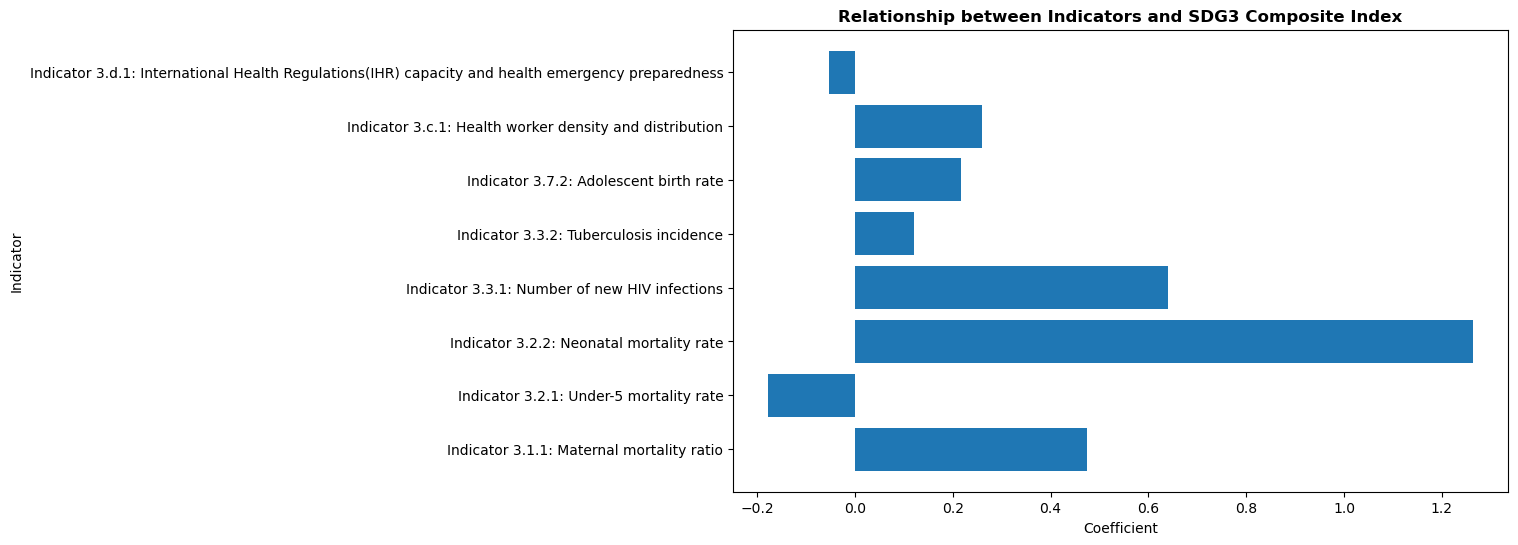

Intercept: 3.0646337080847417


In [72]:
import matplotlib.pyplot as plt

# Get the coefficients and intercept from the trained model
coefficients = model.coef_
intercept = model.intercept_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(indicator_columns, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Indicator')
plt.title('Relationship between Indicators and SDG3 Composite Index', fontweight='bold')
plt.show()

# Print the intercept
print('Intercept:', intercept)

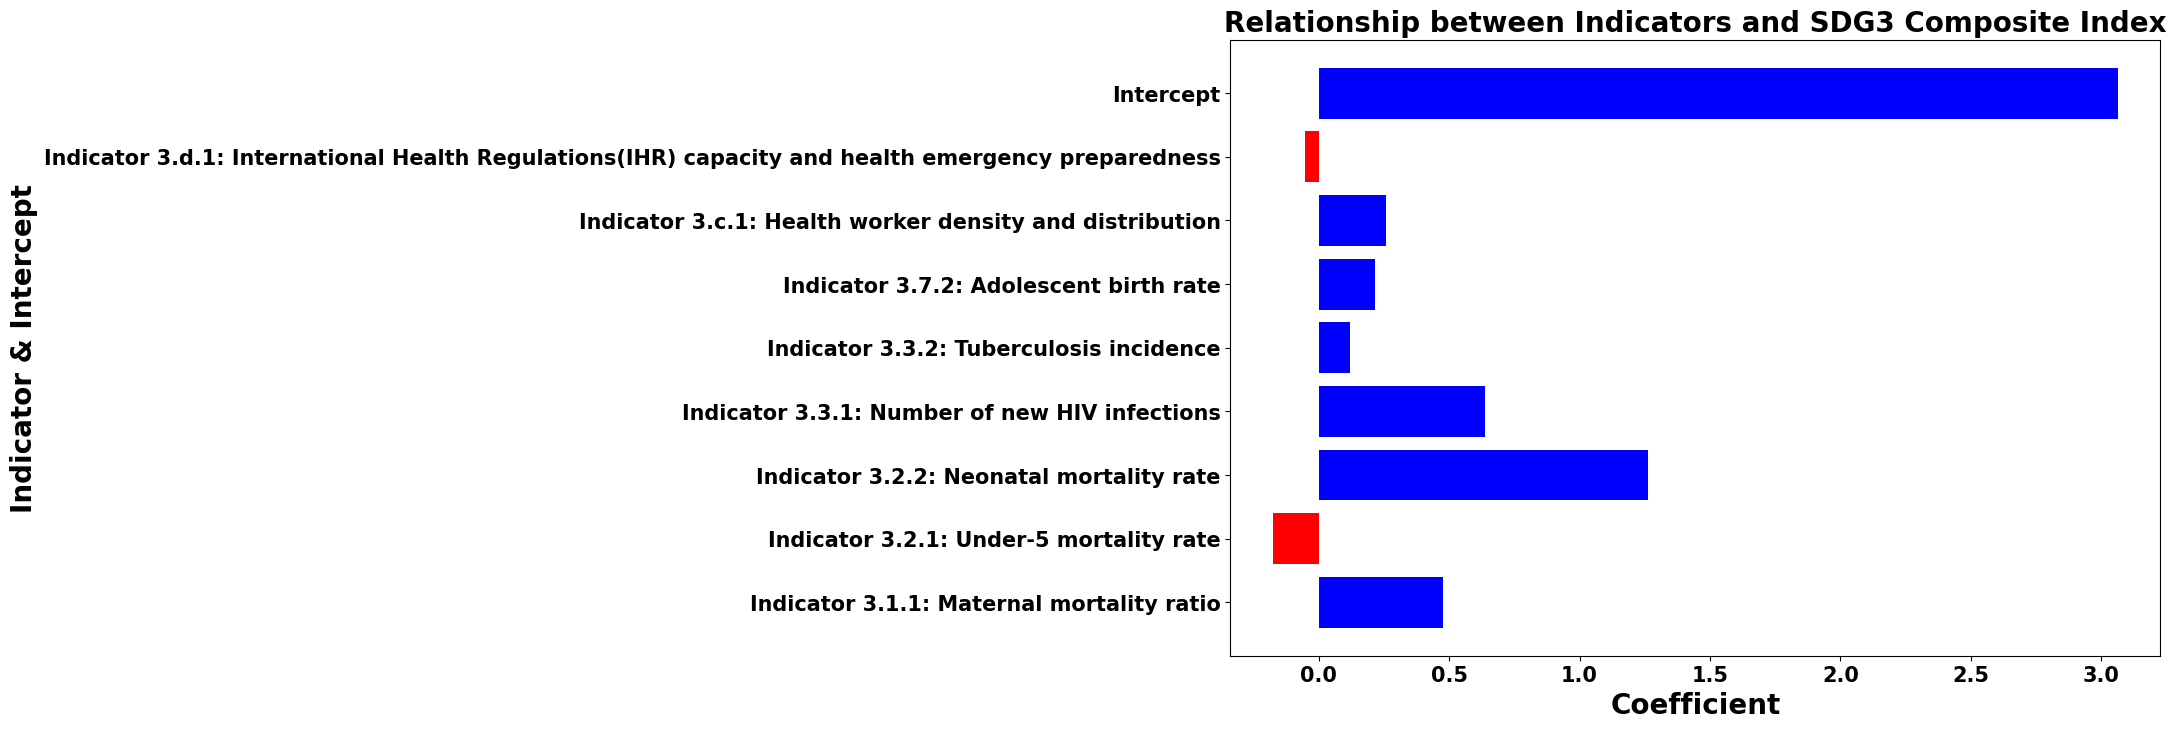

Intercept: 3.0646337080847417


In [83]:
import matplotlib.pyplot as plt

# Get the coefficients and intercept from the trained model
coefficients = model.coef_
intercept = model.intercept_

# Create a list of indicator names including the intercept
indicator_names = list(indicator_columns) + ['Intercept']

# Create a list of coefficient values including the intercept
coefficient_values = list(coefficients) + [intercept]
colors = ['blue' if c > 0 else 'red' for c in coefficients]

# Plot the coefficients
plt.figure(figsize=(12, 8))
plt.barh(indicator_names, coefficient_values, color=colors)
plt.xlabel('Coefficient', fontweight='bold', fontsize=20)
plt.ylabel('Indicator & Intercept', fontweight='bold', fontsize=20)
plt.title('Relationship between Indicators and SDG3 Composite Index', fontweight='bold', fontsize=20)
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.show()

# Print the intercept
print('Intercept:', intercept)

In [76]:


# Create a dataframe to store the coefficients and indicators
coefficients_df = pd.DataFrame({'Indicator': indicator_columns, 'Coefficient': coefficients})

# Print the dataframe
coefficients_df

,Indicator,Coefficient
0,Indicator 3.1.1: Maternal mortality ratio,0.475320
1,Indicator 3.2.1: Under-5 mortality rate,-0.177300
2,Indicator 3.2.2: Neonatal mortality rate,1.263189
3,Indicator 3.3.1: Number of new HIV infections,0.639180
4,Indicator 3.3.2: Tuberculosis incidence,0.120579
5,Indicator 3.7.2: Adolescent birth rate,0.217180
6,Indicator 3.c.1: Health worker density and dis...,0.259159
7,Indicator 3.d.1: International Health Regulati...,-0.053346



# Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the independent variables (indicators) and the dependent variable (SDG3 composite index)
X = df[indicator_columns]
y = df['SDG3 Composite Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


# model Evaluation

In [85]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Mean Squared Error:", mse_rf)
print("R-Squared Score:", r2_rf)

Mean Squared Error: 0.015945053510345773
R-Squared Score: 0.993146867614518


In [86]:
# Create a dataframe to compare the predicted and actual values
comparison_df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Print the dataframe
comparison_df_rf.head(10)

,Actual,Predicted
297,2.309812,2.327931
969,2.597788,2.589453
3434,3.041895,2.993065
598,2.528630,2.508864
2377,2.336728,2.351504
3668,2.892455,2.820904
4068,5.091450,4.882385
1904,3.182685,3.140960
1216,2.781030,2.690618
677,4.958862,5.171022


# Feature Importance:

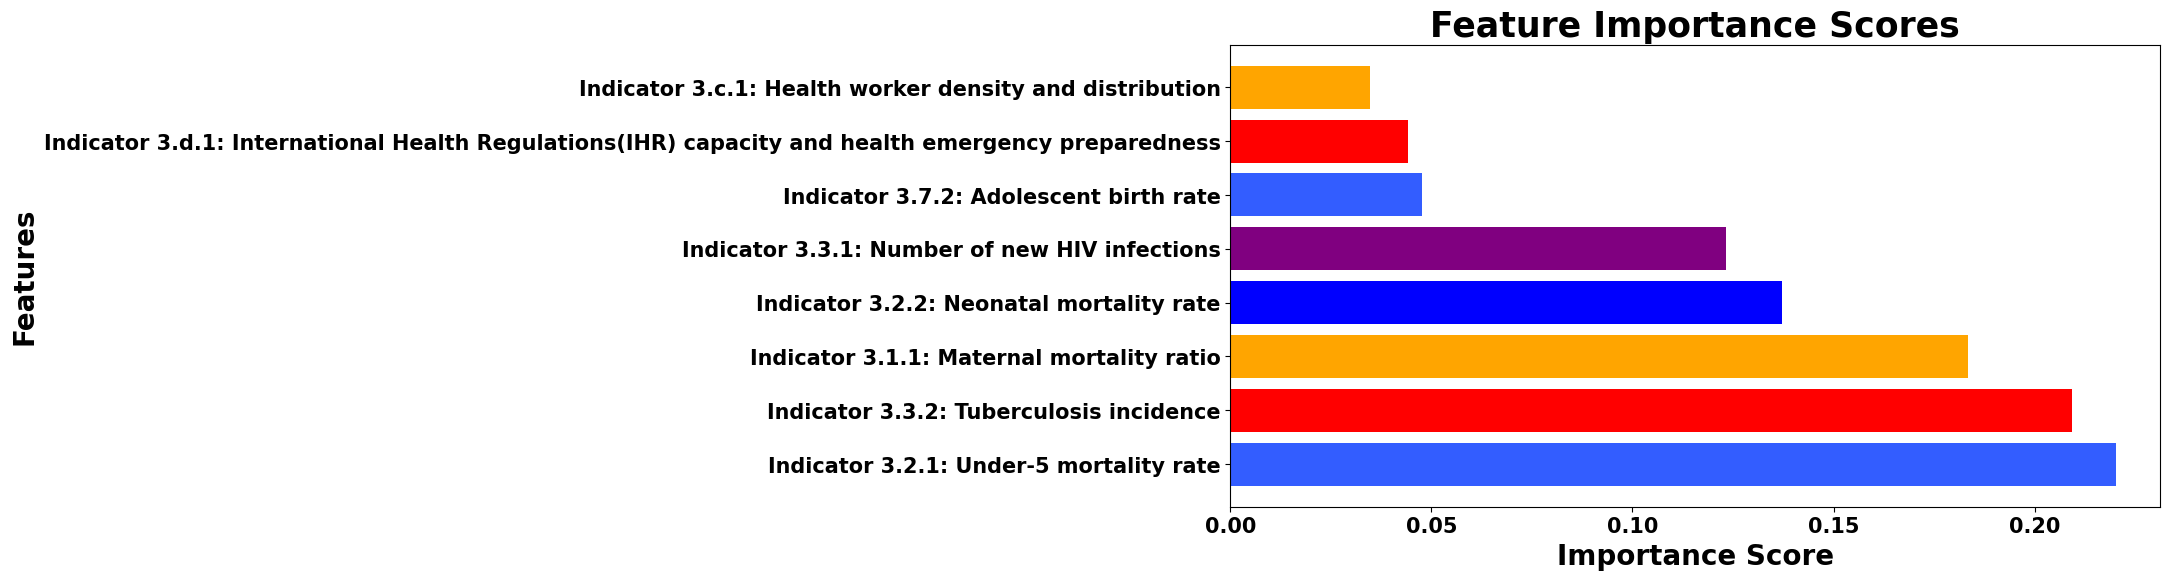

                                             Feature  Importance
1            Indicator 3.2.1: Under-5 mortality rate    0.220242
4            Indicator 3.3.2: Tuberculosis incidence    0.209353
0          Indicator 3.1.1: Maternal mortality ratio    0.183464
2           Indicator 3.2.2: Neonatal mortality rate    0.137148
3      Indicator 3.3.1: Number of new HIV infections    0.123205
5             Indicator 3.7.2: Adolescent birth rate    0.047661
7  Indicator 3.d.1: International Health Regulati...    0.044151
6  Indicator 3.c.1: Health worker density and dis...    0.034777


In [90]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define the features (independent variables)
features = df[indicator_columns]

# Define the target variable (dependent variable)
target = df['SDG3 Composite Index']

# Initialize the Random Forest regressor
rf = RandomForestRegressor()

# Fit the Random Forest model
rf.fit(features, target)

# Get the feature importance scores
importance_scores = rf.feature_importances_

# Create a dataframe with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': indicator_columns, 'Importance': importance_scores})

# Sort the dataframe by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

colors_list = ['#335DFF', 'Red', 'Orange', 'Blue', 'purple']
# Plot the feature importance scores
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors_list)
plt.xlabel('Importance Score', fontweight='bold', fontsize=20)
plt.ylabel('Features', fontweight='bold', fontsize=20)
plt.yticks(fontweight='bold', fontsize=15)
plt.xticks(fontweight='bold', fontsize=15)
plt.title('Feature Importance Scores', fontweight='bold', fontsize=25)
plt.show()

# Print the feature importance scores
print(feature_importance_df)

# Support Vector Machines (SVM)

In [91]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the independent variables (indicators) and the dependent variable (SDG3 composite index)
X = df[indicator_columns]
y = df['SDG3 Composite Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVR(kernel='linear')

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)



In [93]:
# Evaluate the model
mse_SVM = mean_squared_error(y_test, y_pred)
r2_SVM = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:",mse_SVM)
print("R-Squared Score:", r2_SVM)

Mean Squared Error: 0.3805148443147493
R-Squared Score: 0.8364559516192236


## comparing the models

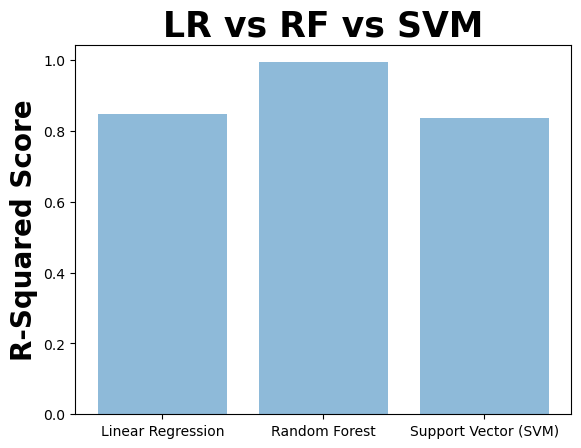

In [94]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

objects = ('Linear Regression', 'Random Forest', 'Support Vector (SVM)')
y_pos=np.arange(len(objects))
performance1=[r2, r2_rf, r2_SVM]
performance2 = [mse, mse_rf, mse_SVM]
plt.tight_layout()

plt.bar(y_pos, performance1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R-Squared Score', fontsize=20, fontweight='bold')
plt.title('LR vs RF vs SVM', fontsize=25, fontweight='bold')
plt.show()

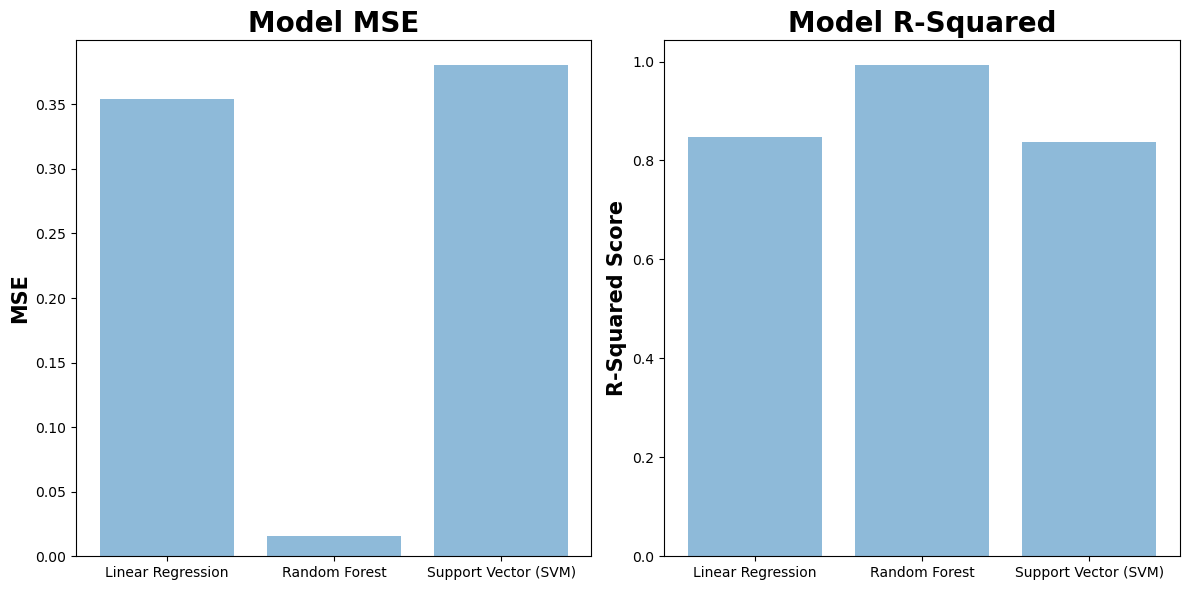

In [96]:
import matplotlib.pyplot as plt
import numpy as np

objects = ('Linear Regression', 'Random Forest', 'Support Vector (SVM)')
y_pos = np.arange(len(objects))

performance1 = [r2, r2_rf, r2_SVM]
performance2 = [mse, mse_rf, mse_SVM]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for MSE
axs[0].bar(y_pos, performance2, align='center', alpha=0.5)
axs[0].set_xticks(y_pos)
axs[0].set_xticklabels(objects)
axs[0].set_ylabel('MSE', fontsize=15, fontweight='bold')
axs[0].set_title('Model MSE', fontsize=20, fontweight='bold')

# Plot for R-squared
axs[1].bar(y_pos, performance1, align='center', alpha=0.5)
axs[1].set_xticks(y_pos)
axs[1].set_xticklabels(objects)
axs[1].set_ylabel('R-Squared Score', fontsize=15, fontweight='bold')
axs[1].set_title('Model R-Squared', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()